In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 파일 읽어오기
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
# 외부 데이터를 가져오면 데이터 분석이 가장 중요
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# 데이터 파악 : 결측치, 행, 열 파악
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
# 전처리
# 결측치 여부 확인
# titanic.isnull().value_counts()
titanic.isnull().sum()

# 컬럼명 변경 : Sex -> Gender
titanic.rename(columns={'Sex' : 'Gender'}, inplace=True)

In [7]:
# .csv파일로 저장
titanic.to_csv('titanic.csv', encoding='UTF-8', index=False)

In [3]:
# titanic.csv파일 읽어오기
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [9]:
# 분석 -> 변수 사이의 관계로 가설을 세워 무엇을 분석할 것인지 정함
# 1. 성별 전체의 생존 총 인원 수
surviver = titanic[titanic.Survived == 1].groupby('Gender').size()
# total_female = titanic[titanic.Gender=='female'].count()[0]
# total_male = len(titanic.index) - total_female
# print(surviver.size())

In [10]:
# # 성별 전체의 생존, 사망 비율
# # 방법 1
# print(f'여성 사망자 비율 : {surviver.size()[0]["female"]/total_female*100}')
# print(f'여성 생존자 비율 : {surviver.size()[1]["female"]/total_female*100}')
# print(f'남성 사망자 비율 : {surviver.size()[0]["male"]/total_male*100}')
# print(f'남성 생존자 비율 : {surviver.size()[1]["male"]/total_male*100}')
# # 사망자의 비율이 남자가 더 높음

In [11]:
# 방법 2. 구하기 쉬운 형태로 구한 후 행 위치 변경
g_s = titanic.groupby('Gender').Survived.value_counts(normalize=True).sort_index() * 100

In [12]:
g_s.unstack()

Survived,0,1
Gender,,
female,25.796178,74.203822
male,80.977312,19.022688


In [13]:
# unstack할 행 지정 가능
g_s.unstack('Gender')

Gender,female,male
Survived,,
0,25.796178,80.977312
1,74.203822,19.022688


In [14]:
# 멀티인덱스도 내부적으로 인덱스를 사용해 인덱스로 지정가능
g_s.unstack(0)

Gender,female,male
Survived,,
0,25.796178,80.977312
1,74.203822,19.022688


In [15]:
# 행을 언스택한 후 다시 스택형태로 만듦
g_s.unstack(0).stack()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
dtype: float64

In [16]:
# 행 위치 변경
g_s.swaplevel().sort_index()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
Name: proportion, dtype: float64

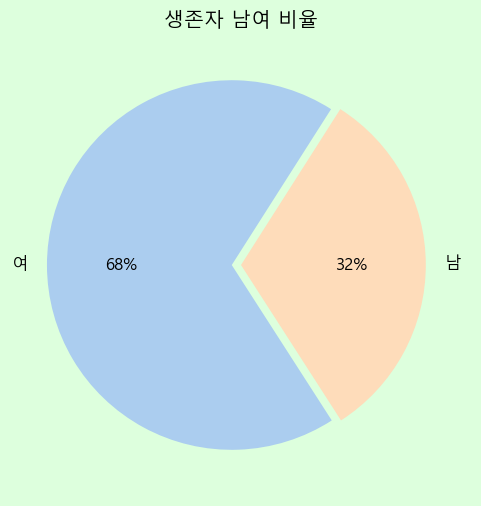

In [17]:
# 시각화 
# 생존자 남여 비율 원형 그래프로 출력
# 조각에 이름 부여, 퍼센트 출력
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rc('font', size=12)

plt.figure(figsize=(6, 6), facecolor='#dfd')
plt.title('생존자 남여 비율')

plt.pie(surviver,
        autopct='%.f%%',
        labels=['여', '남'],
        colors=['#abcdef', '#fedcba'],
        explode=[0.05, 0],
        startangle=57.5)

# plt.show()
plt.savefig('생존자 남여 비율.png', dpi=150) # show함수가 실행되면 저장 불가

- 가설1. 생존자의 성별 비율은 비슷할 것이다.
    - 생존자 342명 중 여자는 233명(68%), 남자는 109(32%)으로 여자가 남자의 2배 이상 생존
    - 여성과 아이를 우선으로 대피시켜 여자의 생존율이 더 높게 나왔다

In [18]:
# 2. 1등실 승객의 생존율
# survived_plass1 = titanic[titanic.Survived==1].Pclass.value_counts(normalize=True)  * 100

# survived_pclass2 = titanic[titanic.Survived==1].groupby('Pclass').size()
# total_survived = survived_pclass2.sum()
# (survived_pclass2 / total_survived * 100).round(0)
pclass_survived = titanic.groupby(['Pclass', 'Survived']).size()
pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
dtype: int64

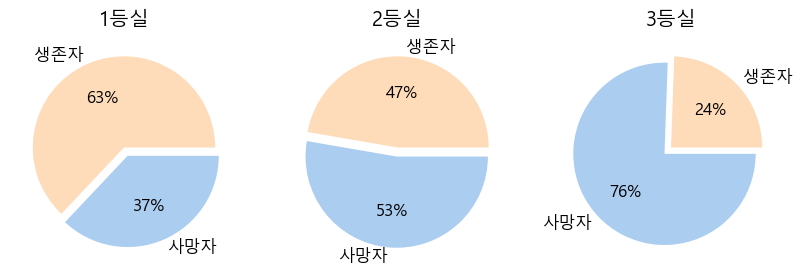

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

pclass_survived = titanic.groupby(['Pclass', 'Survived']).size()

fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,5)

labels=['사망자', '생존자']
colors=['#abcdef', '#fedcba']

# ax[0].pie(pclass_survived[1],
#           autopct='%.0f%%',
#           explode=[0.1, 0],
#           labels=labels,
#           colors=colors,
#           counterclock=False,)
# ax[0].set_title('1등실')

# ax[1].pie(pclass_survived[2],
#           autopct='%.0f%%',
#           explode=[0.1, 0],
#           labels=labels,
#           colors=colors,
#           counterclock=False,)
# ax[1].set_title('2등실')

# ax[2].pie(pclass_survived[3],
#            autopct='%.0f%%',
#            explode=[0.1, 0],
#            labels=labels,
#            colors=colors,
#            counterclock=False,)
# ax[2].set_title('3등실')

for idx in range(0,3):
    ax[idx].pie(pclass_survived[idx+1],
          autopct='%.0f%%',
          explode=[0.1, 0],
          labels=labels,
          colors=colors,
          counterclock=False,)
    ax[idx].set_title(f'{idx+1}등실')

# plt.show()
plt.savefig('등실별 생존 사망 비율', dpi=150)

In [16]:
# 행의 합 : 같은 열에 값의 합
g_pclass_survived_unstack = g_pclass_survived.unstack()
g_pclass_survived_unstack.sum()

# 열의 합 : 같은 행에 있는 값의 합
g_pclass_survived_unstack.sum(axis=1)

# 열의 합 추가
g_pclass_survived_unstack['합'] = g_pclass_survived_unstack.sum(axis=1)
g_pclass_survived_unstack

Survived,0,1,합
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487


In [12]:
# 사망자 비율 추가
g_pclass_survived_unstack['사망자 비율'] = g_pclass_survived_unstack[0] / g_pclass_survived_unstack.합
g_pclass_survived_unstack

Survived,0,1,합,사망자 비율
Pclass,,,,
1,80,136,216,0.370370
2,97,87,184,0.527174
3,368,119,487,0.755647


In [14]:
# 생존자 비율 추가
g_pclass_survived_unstack['생존자 비율'] = g_pclass_survived_unstack[1] / g_pclass_survived_unstack.합
g_pclass_survived_unstack

Survived,0,1,합,사망자 비율,생존자 비율
Pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,368,119,487,0.755647,0.244353


In [29]:
# 카테고리
titanic.groupby('Pclass').Survived.value_counts(normalize=True).unstack()

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.755647,0.244353


- 가설2. 1등실 승객의 생존율이 가장 높을 것이다
    - 승객 총 887명 
        - 1등실 인원 216명 : 생존자 136명(약 63%)
        - 2등실 인원 184명 : 생존자 87명(약 47%)
        - 3등실 인원 487명 : 생존자 119명(약 24%)
        
    - 생존율이 가장 높은 등실은 약 63%로 1등실 승객이 가장 높고, 다음으로 약 47%인 2등실, 마지막으로 약 24%인 3등실 순이었다.

- “고령자”란 55세 이상인 사람을 말합니다
- 「고용상 연령차별금지 및 고령자고용촉진에 관한 법률」 제2조제1호 
- 「고용상 연령차별금지 및 고령자고용촉진에 관한 법률 시행령」 제2조제1항

In [30]:
# 3. 사망자 중 고령자 비율
# titanic[titanic.Survived==0].Age.value_counts(normalize=True).head(10) * 100

# 필요한 데이터가 없다면 필요한 데이터 추가
# 사망자 중 고령자 분류
titanic[titanic.Survived==0]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500


In [31]:
# 1세 미만
titanic[titanic.Age<1]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,1,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
827,1,2,Master. George Sibley Richards,male,0.83,1,1,18.7500


In [35]:
# 나이 분포
titanic.Age.value_counts()

Age
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: count, Length: 89, dtype: int64

In [36]:
# 나이 분포 - 나이 기준으로 오름차순
# 연속형 데이터(continuous values) : 계속 이어지는 데이터(나이, 시간, 날짜...)
# 범주형 데이터(categrical values) : 카테고리 - 범위가 정해져 있는 데이터
titanic.Age.value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 89, dtype: int64

In [40]:
# 최대 나이
titanic.Age.max()

80.0

In [41]:
# 최소 나이
titanic.Age.min()

0.42

In [55]:
# 최대, 최소 나이
# aggregate : 집합, 집합체
# 함수명을 문자열로

# titanic.Age.agg(['max','min']) # Series
# titanic.agg({'Age' : ['max','min']}) # DataFrame
titanic.agg({'Age' : ['max','min'], 'Fare' : ['max', 'min']}).T # DataFrame

,max,min
Age,80.0000,0.42
Fare,512.3292,0.00


In [ ]:
# 연속형 -> 범주형
# 범주 : 55세 미만, 55세 이상

# 방법 1. 직접 레이블링 -> object
# 레이블링(labeling) : 분류된 데이터나 정보에 이름(label)을 부여
# 55세 미만 - A
# 55세 이상 - B

In [5]:
# 1-1. 모든 값이 0인 AgeBand 컬럼 추가
titanic['AgeBand'] = 0

In [6]:
# 1-2. 55세 미만 - A, 55세 이상 - B
# titanic.loc[titanic.Age < 55, 'AgeBand'] = 'A'

for idx, age in enumerate(titanic.Age, 0):
    titanic.iloc[idx, -1] = 'A' if (age < 55) else 'B'

In [7]:
titanic[titanic.Age >= 55].head()

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,AgeBand
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500,B
15,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000,B
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000,B
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,61.9792,B
63,0,1,Mr. Albert A Stewart,male,64.0,0,0,27.7208,B


In [8]:
# 55세 미만, 55세 이상 승객 수
titanic.AgeBand.value_counts()

AgeBand
A    838
B     49
Name: count, dtype: int64

In [9]:
# 방법 2. cut() -> category

In [10]:
data = pd.DataFrame({
    '짝수' : [2, 4, 6]
})
data

,짝수
0,2
1,4
2,6


In [11]:
pd.cut(data.짝수, bins=[3, 5], labels=['A'])
# (] - ( : 제외(해당하는 값만)
#    - [ : 포함
# [3, 5] - 4 ~ 5 구간 생성

0    NaN
1      A
2    NaN
Name: 짝수, dtype: category
Categories (1, object): ['A']

In [12]:
pd.cut(data.짝수, bins=[1, 3, 5], labels=['A', 'B'])
# [1, 3, 5] - 2 ~ 3 구간 생성, 4 ~ 5 구간 생성

0      A
1      B
2    NaN
Name: 짝수, dtype: category
Categories (2, object): ['A' < 'B']

In [13]:
pd.cut(data.짝수, bins=[1, 4, 6], labels=['A', 'B'])
# [1, 4, 6] - 2 ~ 4 구간 생성, 5 ~ 6 구간 생성

0    A
1    A
2    B
Name: 짝수, dtype: category
Categories (2, object): ['A' < 'B']

In [14]:
# AgeCut 컬럼 추가
titanic['AgeCut'] = 0

In [15]:
# cut함수를 통해 레이블링
ageCut = pd.cut(titanic.Age, bins=[0, 54, 80], labels=['A', 'B'])
ageCut.value_counts()

Age
A    838
B     49
Name: count, dtype: int64

In [16]:
# 레이블링한 시리즈를 AgeCut컬럼에 대입
titanic['AgeCut'] = ageCut

In [17]:
# 검증 - 경계값 확인
# titanic.AgeCut.value_counts()
# titanic[(titanic.Age >= 53) & (titanic.Age <=56)]
# titanic[titanic.Age.isin([53, 54, 55, 56])] # 인수에 해당하는 데이터가 존재하는지 검사

# 검증 - 데이터 개수 확인
titanic[['AgeBand', 'AgeCut']].value_counts()

AgeBand  AgeCut
A        A         838
B        B          49
Name: count, dtype: int64

In [18]:
# 직접 레이블링한 컬럼의 Dtype은 object
# cut함수를 사용한 컬럼의 Dtype은 category
# 범주형 데이터로 만들 땐 cut함수를 사용하는 것을 권장함
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    object  
 3   Gender                   887 non-null    object  
 4   Age                      887 non-null    float64 
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children Aboard  887 non-null    int64   
 7   Fare                     887 non-null    float64 
 8   AgeBand                  887 non-null    object  
 9   AgeCut                   887 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.5+ KB


In [31]:
# 사망자 데이터 추출 : 545명
g_agecut = titanic[titanic.Survived==0].groupby('AgeCut').size().to_frame() # 시리즈를 프레임으로
g_agecut

,0
AgeCut,
A,509
B,36


In [32]:
# 55세 이상 미만의 사망자 비율 rate컬럼으로 추가
g_agecut['rate'] = g_agecut / g_agecut.sum()
g_agecut

,0,rate
AgeCut,,
A,509,0.933945
B,36,0.066055


In [33]:
g_agecut.loc['합'] = g_agecut.sum()
g_agecut

,0,rate
AgeCut,,
A,509.0,0.933945
B,36.0,0.066055
합,545.0,1.000000


In [34]:
g_agecut[0] = g_agecut[0].astype(int)
g_agecut

,0,rate
AgeCut,,
A,509,0.933945
B,36,0.066055
합,545,1.000000


In [37]:
g_agecut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to 합
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      int32  
 1   rate    3 non-null      float64
dtypes: float64(1), int32(1)
memory usage: 60.0+ bytes


- 사망자는 고령자가 많을 것이다.
    - 사망자 총 545명 중 고령자는 36명(약 7%)로 나타났다.
    - 사망자의 약 93%는 고령자가 아닌 55세 미만으로 나타났다.

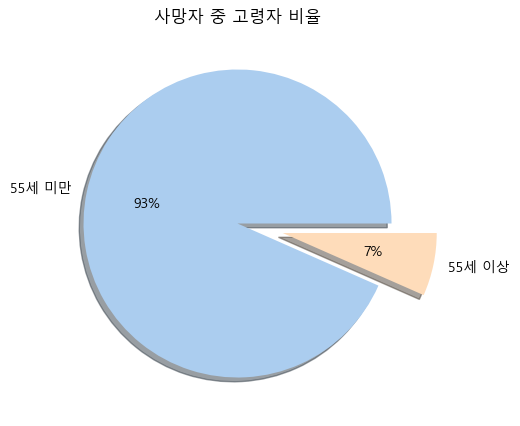

In [52]:
plt.rc('font', family='Malgun Gothic')

# 시각화
g_agecut[0][['A','B']].plot(
    kind='pie',
    title='사망자 중 고령자 비율',
    figsize=(5, 5),
    autopct='%.f%%',
    labels=['55세 미만', '55세 이상'],
    explode=[0, 0.3],
    colors=['#abcdef', '#fedcba'],
    ylabel='',
    shadow=True
)

plt.savefig('사망자 중 고령자 비율.png')

In [58]:
g_agecut2 = titanic.groupby(['AgeCut','Survived'])
g_agecut2_size = g_agecut2.size()
# g_agecut2_size.plot(
#     kind='pie',
#     subplots=True,
#     autopct='%.0f%%',
# )